# Introduction to the project 
Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  
Requirements  
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  



# Part 1: (Column Names are denoted by quotation marks)  
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories?  
•	Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?  
•	What are the 3 most common “mechanics” in the dataset?  

### Dataframe Exploration 
<b>Libraries</b> 

I will add the most essential libraries for data manipulation, such as pandas and numpy and data visualisation, such as seaborn and matplotlib. Visualisation packages will allow me to explore data insights. 

The visualisation libraries have slightly different options in visualisation. I will import both of them in case of my convenience to work with the code and broader options in visualisation. I will consider more libraries in later steps. 





In [1]:
#Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reach to the Google drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read the dataset
b_games = pd.read_csv("/content/drive/MyDrive/Data Analytics/Data Visualisation/BoardGame/board_games.csv")
b_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


I will explore data from the table to find shape, data types, missing values, statistical representation of the data. 

In [4]:
b_games.shape

(10532, 22)

In [5]:
b_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [6]:
b_games.isna().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [7]:
b_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


The datafrane consist of  22 columns and 10532 rows. 

Data types of the dataset: objects, floats and integers. 

Missing Values: artist - 2773, compilation - 10122, designer - 126, expansion - 7780, family - 2808, mechanic - 950. 


### What are the top 5 “average rated” games?

I will desplay the game's name and average_rating. From statistaical represenatation I can see average rating has a range from 1 to 9. The values represented in decimals. It will be better if I plot histogram to see the values and how they are destributed. We also have, multible number of unique names in the dataset. I will explore number of repetitive values whatwhat could be there.

The main task in this stage to find the top 5 rated games. It means I wil be working with two column which a shoud sort by average rating of the game. I have to columns involved into the task, I will take an aproche by sorting the names by values of each column. I will use sort_value() function in order to solve the task. This function wil place values in decsending order. 


In [8]:
b_games["average_rating"].sort_values(ascending=False)

8348    9.00392
6392    8.93184
9964    8.84862
8526    8.84603
9675    8.83081
         ...   
4165    2.33940
4965    2.07772
1972    1.96986
1541    1.84598
5234    1.38421
Name: average_rating, Length: 10532, dtype: float64

<Axes: xlabel='average_rating', ylabel='Count'>

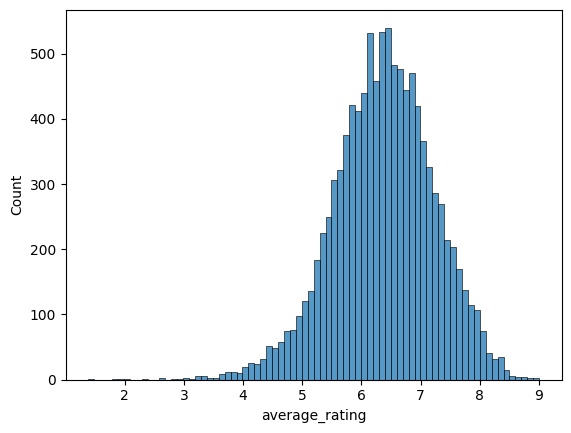

In [9]:
sns.histplot(b_games['average_rating'])

<Axes: >

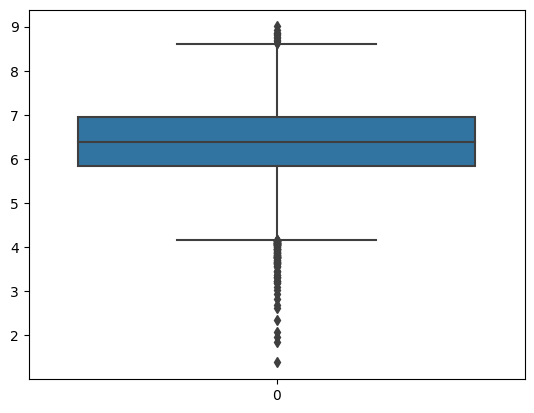

In [10]:
sns.boxplot(b_games['average_rating'])

'average_rating' has a normal distribution. The boxplot shows that the min value starts from 4 and the max ends with 8,6. 

"name" has multiple names so we can relay on sorting by rating 

I assigned the first value to sort by 'average_rating' as it is the main object that we are looking for in this task. After all I will assign 'name'. The code will provided with sorting by rating with the name of the game. 

To visualise it I will use seaborn library:
- barplot() - It will show two features by axis. 
x - average rating
y - name of the game

I will set the rating only for the 5 first features. Duplicated columns will be droped in 'name' as it brings only noise. 

In [14]:
plt.figure(figsize = (12,8))

# Sort the data by rating in descending order and select the top items
top_items = b_games.sort_values(by=['average_rating','name'],
            ascending=False, kind="mergesort").drop_duplicates(subset=['name']).head(5)

# Create a barplot of the top-rated items
sns.barplot(top_items['average_rating'],top_items['name'], orient='h')
plt.title('Top Rated Games')
plt.xlabel('Average Rating')
plt.ylabel('Game Name')
plt.show()

TypeError: ignored

<Figure size 1200x800 with 0 Axes>

The visualisation displays top 5 games:
1. Small World Designer Edition
2. Kingdome Death: Monster
3. Terra Mysterica: Monster
4. Last Chamce for Victory
5. The Greatest Day: Sword, Juno, and Golden Beaches
https://www.youtube.com/watch?v=Zs_C41bSw3o
pandas Sort: Your Guide to Sorting Data in Python https://realpython.com/pandas-sort-python/
https://www.youtube.com/watch?v=1uV_K9GkC-o


### Is there a correlation between the “users_rated” and the “max_playtime”? 

To show correlation between features I will use hitmap and linear regression. Both of this technique used to display correlation between 2 or multiple variables. 

I will use seaborn library with regplot() function to create linear regression between two features  and hitmap() function to display correlation between all the features in the dataframe. 

In [ ]:
corr_coef = b_games['users_rated'].corr(b_games['max_playtime'])

# create a scatter plot with a line of best fit
sns.regplot(x='users_rated', y='max_playtime', data=b_games)
plt.title(f'Correlation = {corr_coef:.2f}')
plt.xlabel('users_rated')
plt.ylabel('max_playtime')
plt.show()

In [ ]:
plt.figure(figsize = (21,18))
mask = np.triu(np.ones_like( b_games.corr(method = "pearson"), dtype=np.bool))
dataplot = sns.heatmap(b_games.corr().round(2), mask=mask, vmin=-1, vmax=1, cmap= "YlGnBu",
                       annot=True) 
# displaying heatmap
plt.show()

Linear regression did not show meaningful insights, It proves that linear regression is not the only tool to work with a correlation of two features. 

hitmap() provided a meaningful outcome where it is clear to see that correlation between “users_rated” and the “max_playtime” is zero. In other words, there is no correlation between them. 

### What is the distribution of game categories?

We alredy know the category of games is text value column. How do we work with text distribution? 
I can build a destribution based on the number of words or number of the most repetetive words.

I will build the didstribution based on the most repetitive words.
In order to that I will clean the data first. 
- I will bring the text to the lowwer case
- I will remove punctuation 
- I will remove stop words

After I will apply advanced text processing techniques such us TF-IDF (Term Frequency – Inverse Document Frequency). It is a numerical statistic that reflects how a word is important  to a document in a collection of documents

In [ ]:
b_games["category"]

In [ ]:
b_games["category"].value_counts()

In [ ]:
b_games['word_count'] = b_games['category'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
 b_games[['category','word_count']].head(-10)

In [ ]:
 b_games['category'] =  b_games['category'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
 b_games['category'].head()

In [ ]:
b_games['category'] = b_games['category'].str.replace('[^\w\s]','') 
b_games['category'].head() 

In [ ]:
from nltk.corpus import stopwords 
stop = stopwords.words('english') 
b_games['category'] = b_games['category'].apply(lambda x: " ".join(x for x in 
x.split() if x not in stop)) 
b_games['category'].head() 

In [ ]:
freq = pd.Series(' '.join(b_games['category']).split()).value_counts()[:10]
freq

In [ ]:
freq = list(freq.index) 
b_games['category'] = b_games['category'].apply(lambda x: " ".join(x for x in 
x.split() if x not in freq)) 
b_games['category'].head() 

In [ ]:
freq = pd.Series(' '.join(b_games['category']).split()).value_counts()[-10:] 
freq 


In [ ]:
freq = list(freq.index) 
b_games['category'] = b_games['category'].apply(lambda x: " ".join(x for x in 
x.split() if x not in freq)) 
b_games['category'].head() 


In [ ]:
!pip install -U textblob 


In [ ]:
#Tokenization
from textblob import TextBlob 
b_games['category'][:5].apply(lambda x: str(TextBlob(x).correct())) 

In [ ]:
TextBlob(b_games['category'][1]).words

In [ ]:
#steaming 
from nltk.stem import PorterStemmer 
st = PorterStemmer() 
b_games['category'][:5].apply(lambda x: " ".join([st.stem(word) for word in 
x.split()]))

In [ ]:
from textblob import Word 
b_games['category'] = b_games['category'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
b_games['category'].head() 

In [ ]:
#Term frequency
tf1 = (b_games['category'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index() 
tf1.columns = ['words','tf'] 
tf1 

In [ ]:
# Inverse Document Frequency
import numpy as np 
for i,word in enumerate(tf1['words']): 
    tf1.loc[i, 'idf'] = np.log(b_games.shape[0]/(len(b_games[b_games['category'].str.contains(word)]))) 
tf1 

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf'] 
tf1 

In [ ]:
# IDF function form skilern 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', 
 stop_words= 'english',ngram_range=(1,1)) 
train_vect = tfidf.fit_transform(b_games['category']) 
train_vect 

In [ ]:
print(train_vect)

### Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

split the data to two groups
before 1992 and after 1992 
find mean of average rating

 time series with a moving average



In [ ]:
b_games["year_published"]

In [ ]:
before = b_games[b_games["year_published"]<=1991]
before

In [ ]:
before_avg = before["average_rating"].mean()
before_avg 

In [ ]:
after = b_games[b_games["year_published"]>1991]
after

In [ ]:
after_avg = after["average_rating"].mean()
after_avg

In [ ]:
avrat_mean = b_games["average_rating"].mean()
avrat_mean

In [ ]:
plt.figure(figsize = (13,8))
sns.lineplot(x="year_published", y="average_rating",
             data=b_games)

In [ ]:
import plotly.express as px